In [116]:
import os

import numpy as np
import pandas as pd

pd.set_option("max_colwidth", 200)

In [2]:
# read all the data
import os

dfs = {}
for root, dirs, files in os.walk("./data", topdown=False):
    for name in files:
        filename = name.split(".")[0]
        if name.endswith("xlsx"):
            dfs[filename] = pd.read_excel(os.path.join(root, name))
        elif name.endswith("csv"):
            dfs[filename] = pd.read_csv(os.path.join(root, name))

In [3]:
dfs.keys()

dict_keys(['twitter-data-dictionary', 'twitter_user', 'twitter_text', 'twitter_hashtag', 'reddit-data-dictionary', 'reddit_comments', 'reddit_posts'])

In [4]:
dfs["twitter-data-dictionary"].head(5)

,Field,Description,Type,Values
0,tweet_id,Unique identifier of the tweet,Integer,Any
1,created_at,Time stamp of when the tweet was sent.,String,"February 22, 2021 - March 2, 2021"
2,full_text,The text of the tweet,String,Any as long as containing keywords. See scraping methodology
3,geo,Geo tag of the tweet. Will only be included if user has location services enabled.,String,NaN
4,coordinates,Latitude and Longitude of the tweet. Will only be included if the user has location services ena...,String,NaN


In [5]:
print(f'number of records: {len(dfs["twitter_text"]):,}')
dfs["twitter_text"].head(2)

number of records: 51,172


,tweet_id,created_at,full_text,geo,coordinates,place,retweet_count,favorite_count,possibly_sensitive,lang,user_id
0,1364223054851813377,Tue Feb 23 14:38:16 +0000 2021,Here’s what's in the COVID relief package:\n \nDirect checks to families\nUnemployment assistanc...,NaN,NaN,NaN,9160,38093,NOT FOUND,en,2.950125e+07
1,1364381497302671362,Wed Feb 24 01:07:52 +0000 2021,Will the National Endowment for the Arts be helping with vaccine distribution?\n\nWill they be p...,NaN,NaN,NaN,6131,18560,NOT FOUND,en,1.201671e+18


In [6]:
print(f'number of users: {len(dfs["twitter_user"]):,}')
print(f'number of unique users: {len(set(dfs["twitter_user"]["user_id"])):,}')

dfs["twitter_user"].head(2)

number of users: 37,010
number of unique users: 37,010


,user_id,user_location,user_verified,user_followers_count
0,29501253,"Burbank, CA",True,2931387
1,1201670995435646976,"Colorado, USA",True,557873


In [7]:
df_tweets_with_users = pd.merge(dfs["twitter_text"], dfs["twitter_user"], on="user_id", how="left")
print(len(df_tweets_with_users))
df_tweets_with_users.tail()

51172


,tweet_id,created_at,full_text,geo,coordinates,place,retweet_count,favorite_count,possibly_sensitive,lang,user_id,user_location,user_verified,user_followers_count
51167,1364598020558491655,Wed Feb 24 15:28:15 +0000 2021,Remember when you saw Toby Young and Julia Hartley-Brewer leading that ‘Anti-vax/Anti-Lockdown p...,NaN,NaN,NaN,0,0,False,en,2.548403e+09,"Where I go, that's where I am",False,97.0
51168,1364594670030962691,Wed Feb 24 15:14:56 +0000 2021,@TamronHallShow please don't put Anti-Vaxxers on your show. I know this is Olivia Newton John's ...,NaN,NaN,NaN,0,0,NOT FOUND,en,1.202001e+08,Boston via Cleveland.,False,1347.0
51169,1364573246885163013,Wed Feb 24 13:49:49 +0000 2021,@BarryCPearson @HilaryWallace1 @stiffenking @lorrain00414525 @heidiEC5 Anti vaxxers ARE a small ...,NaN,NaN,NaN,0,3,False,en,1.976942e+07,"Deepest, Darkest Dorset, UK.",False,4685.0
51170,1364519307103916039,Wed Feb 24 10:15:29 +0000 2021,"@NickBoles Treating the Covid19 vaccines differently to any other vaccine is a dangerous path, a...",NaN,NaN,NaN,0,2,NOT FOUND,en,3.049084e+09,"Haslington, England",False,224.0
51171,1364320252461535235,Tue Feb 23 21:04:30 +0000 2021,"@CGreenUK No, but maybe employers shouldn't be obliged to pay sick pay to those employees who re...",NaN,NaN,NaN,0,0,NOT FOUND,en,7.473517e+17,Uk,False,24.0


In [8]:
dfs["twitter_hashtag"].head(2)

,hashtags,tweet_id
0,Covid,1364726798412443649
1,COVID19,1364726771606691845


In [9]:
df_hashtag = dfs["twitter_hashtag"][~dfs["twitter_hashtag"]['tweet_id'].astype(str).str.startswith('https')]

In [10]:
df_tweets_with_users = df_tweets_with_users[~df_tweets_with_users['tweet_id'].astype(str).str.startswith('https')]

In [11]:
df_hashtag["tweet_id"] = df_hashtag["tweet_id"].astype(np.int64)
df_tweets_with_users["tweet_id"] = df_tweets_with_users["tweet_id"].astype(np.int64)

In [12]:
df_tweets_with_users_ht = pd.merge(df_tweets_with_users, df_hashtag, on="tweet_id", how="left")
print(len(df_tweets_with_users_ht))
df_tweets_with_users_ht.head()

51170


,tweet_id,created_at,full_text,geo,coordinates,place,retweet_count,favorite_count,possibly_sensitive,lang,user_id,user_location,user_verified,user_followers_count,hashtags
0,1364223054851813377,Tue Feb 23 14:38:16 +0000 2021,Here’s what's in the COVID relief package:\n \nDirect checks to families\nUnemployment assistanc...,NaN,NaN,NaN,9160,38093,NOT FOUND,en,2.950125e+07,"Burbank, CA",True,2931387.0,NaN
1,1364381497302671362,Wed Feb 24 01:07:52 +0000 2021,Will the National Endowment for the Arts be helping with vaccine distribution?\n\nWill they be p...,NaN,NaN,NaN,6131,18560,NOT FOUND,en,1.201671e+18,"Colorado, USA",True,557873.0,NaN
2,1364609594056704002,Wed Feb 24 16:14:15 +0000 2021,"This is both anecdotal and early, but many long covid survivors are feeling significantly better...",NaN,NaN,NaN,5941,63174,NOT FOUND,en,3.842872e+07,NaN,True,124131.0,NaN
3,1364726798412443649,Wed Feb 24 23:59:58 +0000 2021,A Link to Professor Chossudovsky’s Analysis of What #Covid Is Really About\nhttps://t.co/glJ9vnn...,NaN,NaN,NaN,1,0,False,en,2.192010e+09,here & now 🇺🇸,False,2947.0,Covid
4,1364726797947052038,Wed Feb 24 23:59:58 +0000 2021,Children warned over hugging grandparents even if they've had vaccine https://t.co/qd5pxDHlFN A ...,NaN,NaN,NaN,0,2,False,en,2.868190e+09,Brighton UK and Bayonne France,False,2556.0,NaN


In [104]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("paraphrase-distilroberta-base-v1")

In [14]:
model.encode(["this is an encoding"]).shape

(1, 768)

In [15]:
model.encode(["this is an encoding"] * 2).shape

(2, 768)

In [109]:
all_tweets = df_tweets_with_users_ht["full_text"].astype(str).values
all_tweets_original = df_tweets_with_users_ht["full_text"].astype(str).values

# process tweets

In [17]:
from nltk.tokenize import TweetTokenizer
from emoji import demojize
import re

tokenizer = TweetTokenizer()

def normalizeToken(token):
    lowercased_token = token.lower()
    if token.startswith("@"):
        return "@USER"
    elif lowercased_token.startswith("http") or lowercased_token.startswith("www"):
        return "HTTPURL"
    elif len(token) == 1:
        return demojize(token)
    else:
        if token == "’":
            return "'"
        elif token == "…":
            return "..."
        else:
            return token

def normalizeTweet(tweet):
    tokens = tokenizer.tokenize(tweet.replace("’", "'").replace("…", "..."))
    normTweet = " ".join([normalizeToken(token) for token in tokens])

    normTweet = normTweet.replace("cannot ", "can not ").replace("n't ", " n't ").replace("n 't ", " n't ").replace("ca n't", "can't").replace("ai n't", "ain't")
    normTweet = normTweet.replace("'m ", " 'm ").replace("'re ", " 're ").replace("'s ", " 's ").replace("'ll ", " 'll ").replace("'d ", " 'd ").replace("'ve ", " 've ")
    normTweet = normTweet.replace(" p . m .", "  p.m.") .replace(" p . m ", " p.m ").replace(" a . m .", " a.m.").replace(" a . m ", " a.m ")

    normTweet = re.sub(r",([0-9]{2,4}) , ([0-9]{2,4})", r",\1,\2", normTweet)
    normTweet = re.sub(r"([0-9]{1,3}) / ([0-9]{2,4})", r"\1/\2", normTweet)
    normTweet = re.sub(r"([0-9]{1,3})- ([0-9]{2,4})", r"\1-\2", normTweet)
    
    return " ".join(normTweet.split())

all_tweets = [normalizeTweet(tweet) for tweet in all_tweets]

In [110]:
# encode every vector
batch_size = 8

encodings = []
for b in range(0, len(all_tweets), batch_size):
    batch_of_tweets = all_tweets[b : b + batch_size]
    encodings.extend(model.encode(batch_of_tweets).tolist())

    if b % (8 * 15) == 0:
        seen = b + batch_size
        print(f"gone thru {seen:,} of {len(all_tweets):,} ({seen/len(all_tweets) * 100:0.2}%)")
        
#     if b > 1000:
#         break

gone thru 8 of 51,170 (0.016%)
gone thru 128 of 51,170 (0.25%)
gone thru 248 of 51,170 (0.48%)
gone thru 368 of 51,170 (0.72%)
gone thru 488 of 51,170 (0.95%)
gone thru 608 of 51,170 (1.2%)
gone thru 728 of 51,170 (1.4%)
gone thru 848 of 51,170 (1.7%)
gone thru 968 of 51,170 (1.9%)
gone thru 1,088 of 51,170 (2.1%)
gone thru 1,208 of 51,170 (2.4%)
gone thru 1,328 of 51,170 (2.6%)
gone thru 1,448 of 51,170 (2.8%)
gone thru 1,568 of 51,170 (3.1%)
gone thru 1,688 of 51,170 (3.3%)
gone thru 1,808 of 51,170 (3.5%)
gone thru 1,928 of 51,170 (3.8%)
gone thru 2,048 of 51,170 (4.0%)
gone thru 2,168 of 51,170 (4.2%)
gone thru 2,288 of 51,170 (4.5%)
gone thru 2,408 of 51,170 (4.7%)
gone thru 2,528 of 51,170 (4.9%)
gone thru 2,648 of 51,170 (5.2%)
gone thru 2,768 of 51,170 (5.4%)
gone thru 2,888 of 51,170 (5.6%)
gone thru 3,008 of 51,170 (5.9%)
gone thru 3,128 of 51,170 (6.1%)
gone thru 3,248 of 51,170 (6.3%)
gone thru 3,368 of 51,170 (6.6%)
gone thru 3,488 of 51,170 (6.8%)
gone thru 3,608 of 51,17

KeyboardInterrupt: 

In [107]:
df_tweets_with_users_ht['paraphrase-distilroberta-base-v1-embedding'] = encodings
df.to_pickle('data/tweets_w_embeddings.pickle')

ValueError: Length of values (51172) does not match length of index (51170)

In [ ]:
hesitency_keywords = ["don't trust", 'not getting the vaccine', '']


In [24]:
def pairwise_cosine_similarity(vectors: np.ndarray) -> np.ndarray:
    return (vectors @ vectors.T) / (
        np.linalg.norm(vectors, axis=1) * np.linalg.norm(vectors, axis=1)
    )

def normalize_vectors(results: np.ndarray) -> np.ndarray:
    num_vectors = results.shape[0]
    normalized_results = results / np.linalg.norm(results, axis=1).reshape(num_vectors, 1)
    return normalized_results

In [25]:
THRESHOLD = 0.7  # must have a high-sish similarity score.
encodings = np.array(encodings)
normalized_encoding = normalize_vectors(encodings)
adjacency_matrix = pairwise_cosine_similarity(normalized_encoding) > THRESHOLD
np.fill_diagonal(adjacency_matrix, 0)

In [31]:
from sknetwork.clustering import Louvain

louvain = Louvain()
community_labels = louvain.fit_transform(adjacency_matrix)

In [33]:
for l in set(community_labels):
    idx = np.argwhere(community_labels==l)[:,0]
    if len(idx) > 1:
        print(f'Community {l}')
        for i in idx:
            print(all_tweets_original[i].replace('\n',' '))
        print()
        print('-----'*10)
        print('-----'*10)        
        print()

Community 0
J&amp;J's COVID-19 shot gets CDC panel backing; vaccine near shipping - https://t.co/iT7nt3jINT #VIXC #Commentary #eWeatherNews https://t.co/3DvJNlmmRL
J&amp;J Covid-19 vaccine receives emergency approval in US https://t.co/dcyXcsVpCW
FDA Panel Recommends Johnson &amp; Johnson Vaccine For COVID-19 https://t.co/z2qr9hApD2
Breaking News: The FDA authorized Johnson &amp; Johnson’s coronavirus vaccine, the first that requires only a single shot. Distribution is expected to begin soon. https://t.co/d8P6Jfi3sM
BREAKING: U.S. approves Johnson &amp; Johnson’s single-dose COVID-19 shot, adding a third vaccine option to the race against the virus. https://t.co/QBCcqXIZ9h
The Food and Drug Administration has authorized Johnson &amp; Johnson’s vaccine for emergency use, making it the third vaccine available to the US public and securing another vital step in the US fight to control Covid-19.  Lets see how Trudeau fucks this up.Canada needs to concur
"FDA grants emergency use authorizat

# count top bigrams

In [ ]:
from collections import Counter

bigrams = zip(words, words[1:])
counts = Counter(bigrams)
print(counts.most_common())

# Sentiment analysis

In [ ]:

from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# Tasks:
# emoji, emotion, hate, irony, offensive, sentiment
# stance/abortion, stance/atheism, stance/climate, stance/feminist, stance/hillary

task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

# download label mapping
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

model = AutoModelForSequenceClassification.from_pretrained(MODEL)
# PT
model.save_pretrained(MODEL)

In [ ]:
model.to('cuda')

In [128]:
def scores_to_labels(scores,labels=labels):
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    output = {}
    for i in range(scores.shape[0]):
        l = labels[ranking[i]]
        s = scores[ranking[i]]
        output[l] = s
#         print(f"{i+1}) {l} {np.round(float(s), 4)}")
    return output

text = "Good night 😊"
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_to_labels(scores)

{'positive': 0.84657794, 'neutral': 0.14581215, 'negative': 0.007609873}

In [ ]:
from collections import defaultdict

community_sentiment = defaultdict(lambda: defaultdict(int))

community_data = []

for community in set(community_labels):
    idx = np.argwhere(community_labels == community)[:, 0]
    for i in idx:
        text = preprocess(all_tweets_original[i])
        encoded_input = tokenizer(text, return_tensors="pt")
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)

        sentiment = scores_to_labels(scores)
        for label in labels:
            community_sentiment[community][label] += sentiment[label] / len(idx)

    community_data.append({
        "community": community,
        "ids_in_community":idx.tolist(),
        "negative_sentiment":community_sentiment[community]['negative'],
        "neutral_sentiment":community_sentiment[community]['neutral'],
        "positive_sentiment":community_sentiment[community]['positive'],
        "number_in_community": len(idx)
    })


In [56]:
idx2id = {i: _id for i, _id in enumerate(df_tweets_with_users_ht['tweet_id'].values)}

In [57]:
df_sentiment = pd.DataFrame(community_data)

<AxesSubplot:xlabel='negative_sentiment', ylabel='Count'>

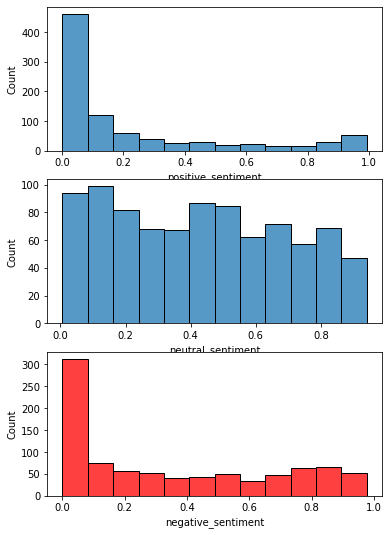

In [106]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(6,12))
ax = plt.subplot(311)
sns.histplot(data=df_sentiment,x='positive_sentiment', bins=12,ax=ax,color='green')

ax = plt.subplot(312)
sns.histplot(data=df_sentiment,x='neutral_sentiment',bins=12,ax=ax)

ax = plt.subplot(313)
sns.histplot(data=df_sentiment,x='negative_sentiment',bins=12,ax=ax, color='red')

In [80]:
def convert_prob_to_class(row):
    ps = row['positive_sentiment']
    ns = row['negative_sentiment']
    ms = row['neutral_sentiment']
    
    if ps > ns and ps > ms:
        return "positive"
    elif ns > ps and ns > ms:
        return "negative"

    return 'neutral'

df_sentiment['sentiment_label'] = df_sentiment.apply(convert_prob_to_class,axis=1)

<AxesSubplot:xlabel='sentiment_label', ylabel='count'>

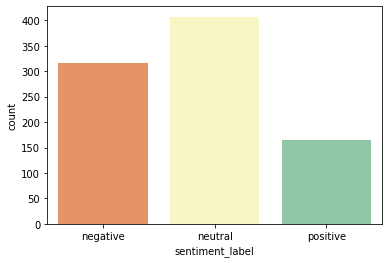

In [90]:
sns.countplot(data=df_sentiment,x='sentiment_label',order=['negative','neutral','positive'], palette='Spectral')

In [96]:
df_sentiment.sort_values(by='negative_sentiment',ascending=False,inplace=True)
df_sentiment.head()

,community,ids_in_community,negative_sentiment,neutral_sentiment,positive_sentiment,number_in_community,sentiment_label,example_tweet
297,297,[998],0.977152,0.020979,0.001869,1,negative,@DrTomFrieden useless....this killed my father...my whole world...all these things are useless.....
377,377,[773],0.973525,0.023009,0.003466,1,negative,I JUST WANT THE COVID VACCINE MAN IM SICK OF LIVING IN FEAR OF A STUPID VIRUS
214,214,[603],0.973282,0.024276,0.002443,1,negative,"@GovTimWalz Shame on you for claiming to care about teachers, your words drip of betrayal/hollow..."
658,658,[75],0.965785,0.029934,0.004280,1,negative,I’ve been waiting outside in line about 2.5 hours now for my 2nd dose of the COVID vaccine. If I...
663,663,[80],0.964885,0.032143,0.002972,1,negative,"this vaccine has made me feel worse than when i actual had covid, the irony"


In [93]:
def get_example_tweet(row):
    return all_tweets_original[row['ids_in_community'][0]]

df_sentiment['example_tweet'] = df_sentiment.apply(get_example_tweet,axis=1)

In [ ]:
df_sentiment

In [117]:
df_sentiment[['community','sentiment_label','negative_sentiment', 'neutral_sentiment','positive_sentiment','example_tweet']].head(12)

,community,sentiment_label,negative_sentiment,neutral_sentiment,positive_sentiment,example_tweet
297,297,negative,0.977152,0.020979,0.001869,@DrTomFrieden useless....this killed my father...my whole world...all these things are useless...they will make any other bio weapon and kill many fathers....a virus...??a pandemic..???vaccination...
377,377,negative,0.973525,0.023009,0.003466,I JUST WANT THE COVID VACCINE MAN IM SICK OF LIVING IN FEAR OF A STUPID VIRUS
214,214,negative,0.973282,0.024276,0.002443,"@GovTimWalz Shame on you for claiming to care about teachers, your words drip of betrayal/hollow politician speak. You tell teachers to find their own CoVid vaccine options and then take them all ..."
658,658,negative,0.965785,0.029934,0.004280,"I’ve been waiting outside in line about 2.5 hours now for my 2nd dose of the COVID vaccine. If I see another stupid mother fucker in public without a mask or one below their nose after today, I’m ..."
663,663,negative,0.964885,0.032143,0.002972,"this vaccine has made me feel worse than when i actual had covid, the irony"
240,240,negative,0.964849,0.031321,0.003830,"“Given all the build up, it was pretty disappointing.”\n\nWhen our Premier constantly acts like a reality game show host, we are bound to keep being disappointed. It’s horrifying how Ontario has f..."
299,299,negative,0.961174,0.035031,0.003795,@KHONnews Fuck the vaccine. Get sick on purpose with something that hasn’t been tested for a virus with a 99.9 % survival rate.. more people gonna die from Vaccination side effects over the next 5...
494,494,negative,0.959506,0.035041,0.005453,@EASPORTSFIFA LAAAAAAAAG!!! Do not say it’s your internet blah blah. You’re a bunch of twats who make billions. Fix the fuck up. The world can get a covid vaccine but you can’t fix your damn serve...
226,226,negative,0.959440,0.038124,0.002436,oh no my teacher got the covid vaccine and now she doesnt feel well
836,836,negative,0.956470,0.040127,0.003403,@LeaderHoyer @POTUS @HouseDemocrats @jaketapper @WHCOS @DanaBashCNN @JohnKingCNN @wolfblitzer @NewDay @EdMarkey @SenJeffMerkley @Morning_Joe @abbydphillip @CDCgov @PoppyHarlowCNN #COVID19 is not l...
